## Задание

Взять задачу с винами (https://www.kaggle.com/rajyellow46/wine-quality) и решить, оформив в виде CrispDM-подхода.

## 1. Понимание бизнеса

### 1.1. Цель

Предсказать оценку вина на основе доступных данных о нем.

### 1.2. Описание

Есть два набора данных с красными и белыми вариантами португальского вина "Vinho Verde". Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, нет данных о типах винограда, марке вина, цене продажи вина и т.п.).

Эти наборы данных можно рассматривать как задачи классификации, так и регрессии. Классы упорядочены и не сбалансированы (например, есть более нормальные вина, чем отличные или плохие). Алгоритмы обнаружения выбросов могут быть использованы для обнаружения нескольких отличных или плохих вин. В датасетах есть сомнения, что все входные переменные актуальны, поэтому следует это проверить. Два набора данных были объединены, и несколько значений были случайно удалены.

## 2. Data Understanding

### 2.1. Import libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Modelling Helpers
from sklearn.model_selection import train_test_split, GridSearchCV
from  sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, f1_score

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline

### 2.2. Загрузка данных

In [2]:
df = pd.read_csv('winequalityN.csv')
df.shape

(6497, 13)

### 2.3. Статистика и визулизация

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Входные переменные (на основе физико-химических тестов):**  
`fixed acidity` - фиксированная кислотность;  
`volatile acidity` - летучая кислотность;  
`citric acid` - лимонная кислота;  
`residual sugar` - остаточный сахар;  
`chlorides` - хлориды;  
`free sulfur dioxide` - свободный диоксид серы;  
`total sulfur dioxide` - общий диоксид серы;  
`density` - плотность;  
`pH` - pH (водородный показатель, где <7 — кислотный раствор, >7 — осн*о*вный);  
`sulphates` - сульфаты;  
`alcohol` - процент содержания алкоголя.  

**Выходная переменная (на основе сенсорных данных):**  
`quality` - оценка качества (от 0 до 10).

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Некоторые наблюдения:  
— верхние квартили признаков `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `sulphates` содержат гораздо большие значения этого показателя, чем первые 75%.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


У части признаков есть отсутствующие значения. Заполним их:

In [6]:
na_feature_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                   'chlorides', 'pH', 'sulphates']

for na_ftr in na_feature_list:
    df[na_ftr] = df[na_ftr].fillna(int(df[na_ftr].median()))

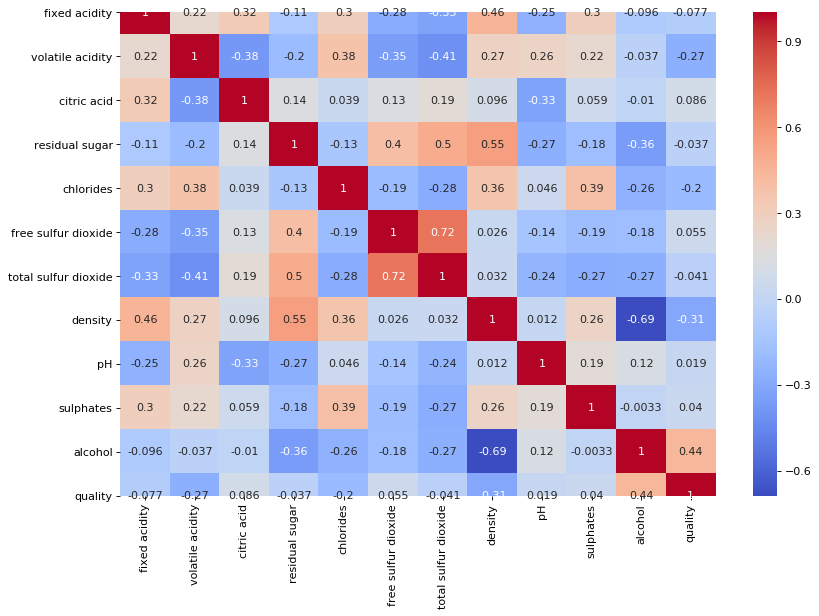

In [7]:
corr_values = df.iloc[:,1:]
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr_values.corr(), yticklabels=corr_values.columns, cbar=True, cmap='coolwarm', annot=True)
plt.show()

Можем заметить выделяющиеся зависимости признаков:  
— сильная прямая корелляция `free sulfur dioxide` и `total sulfur dioxide`;   
— сильная обратная корелляция `density` и `alcohol`.

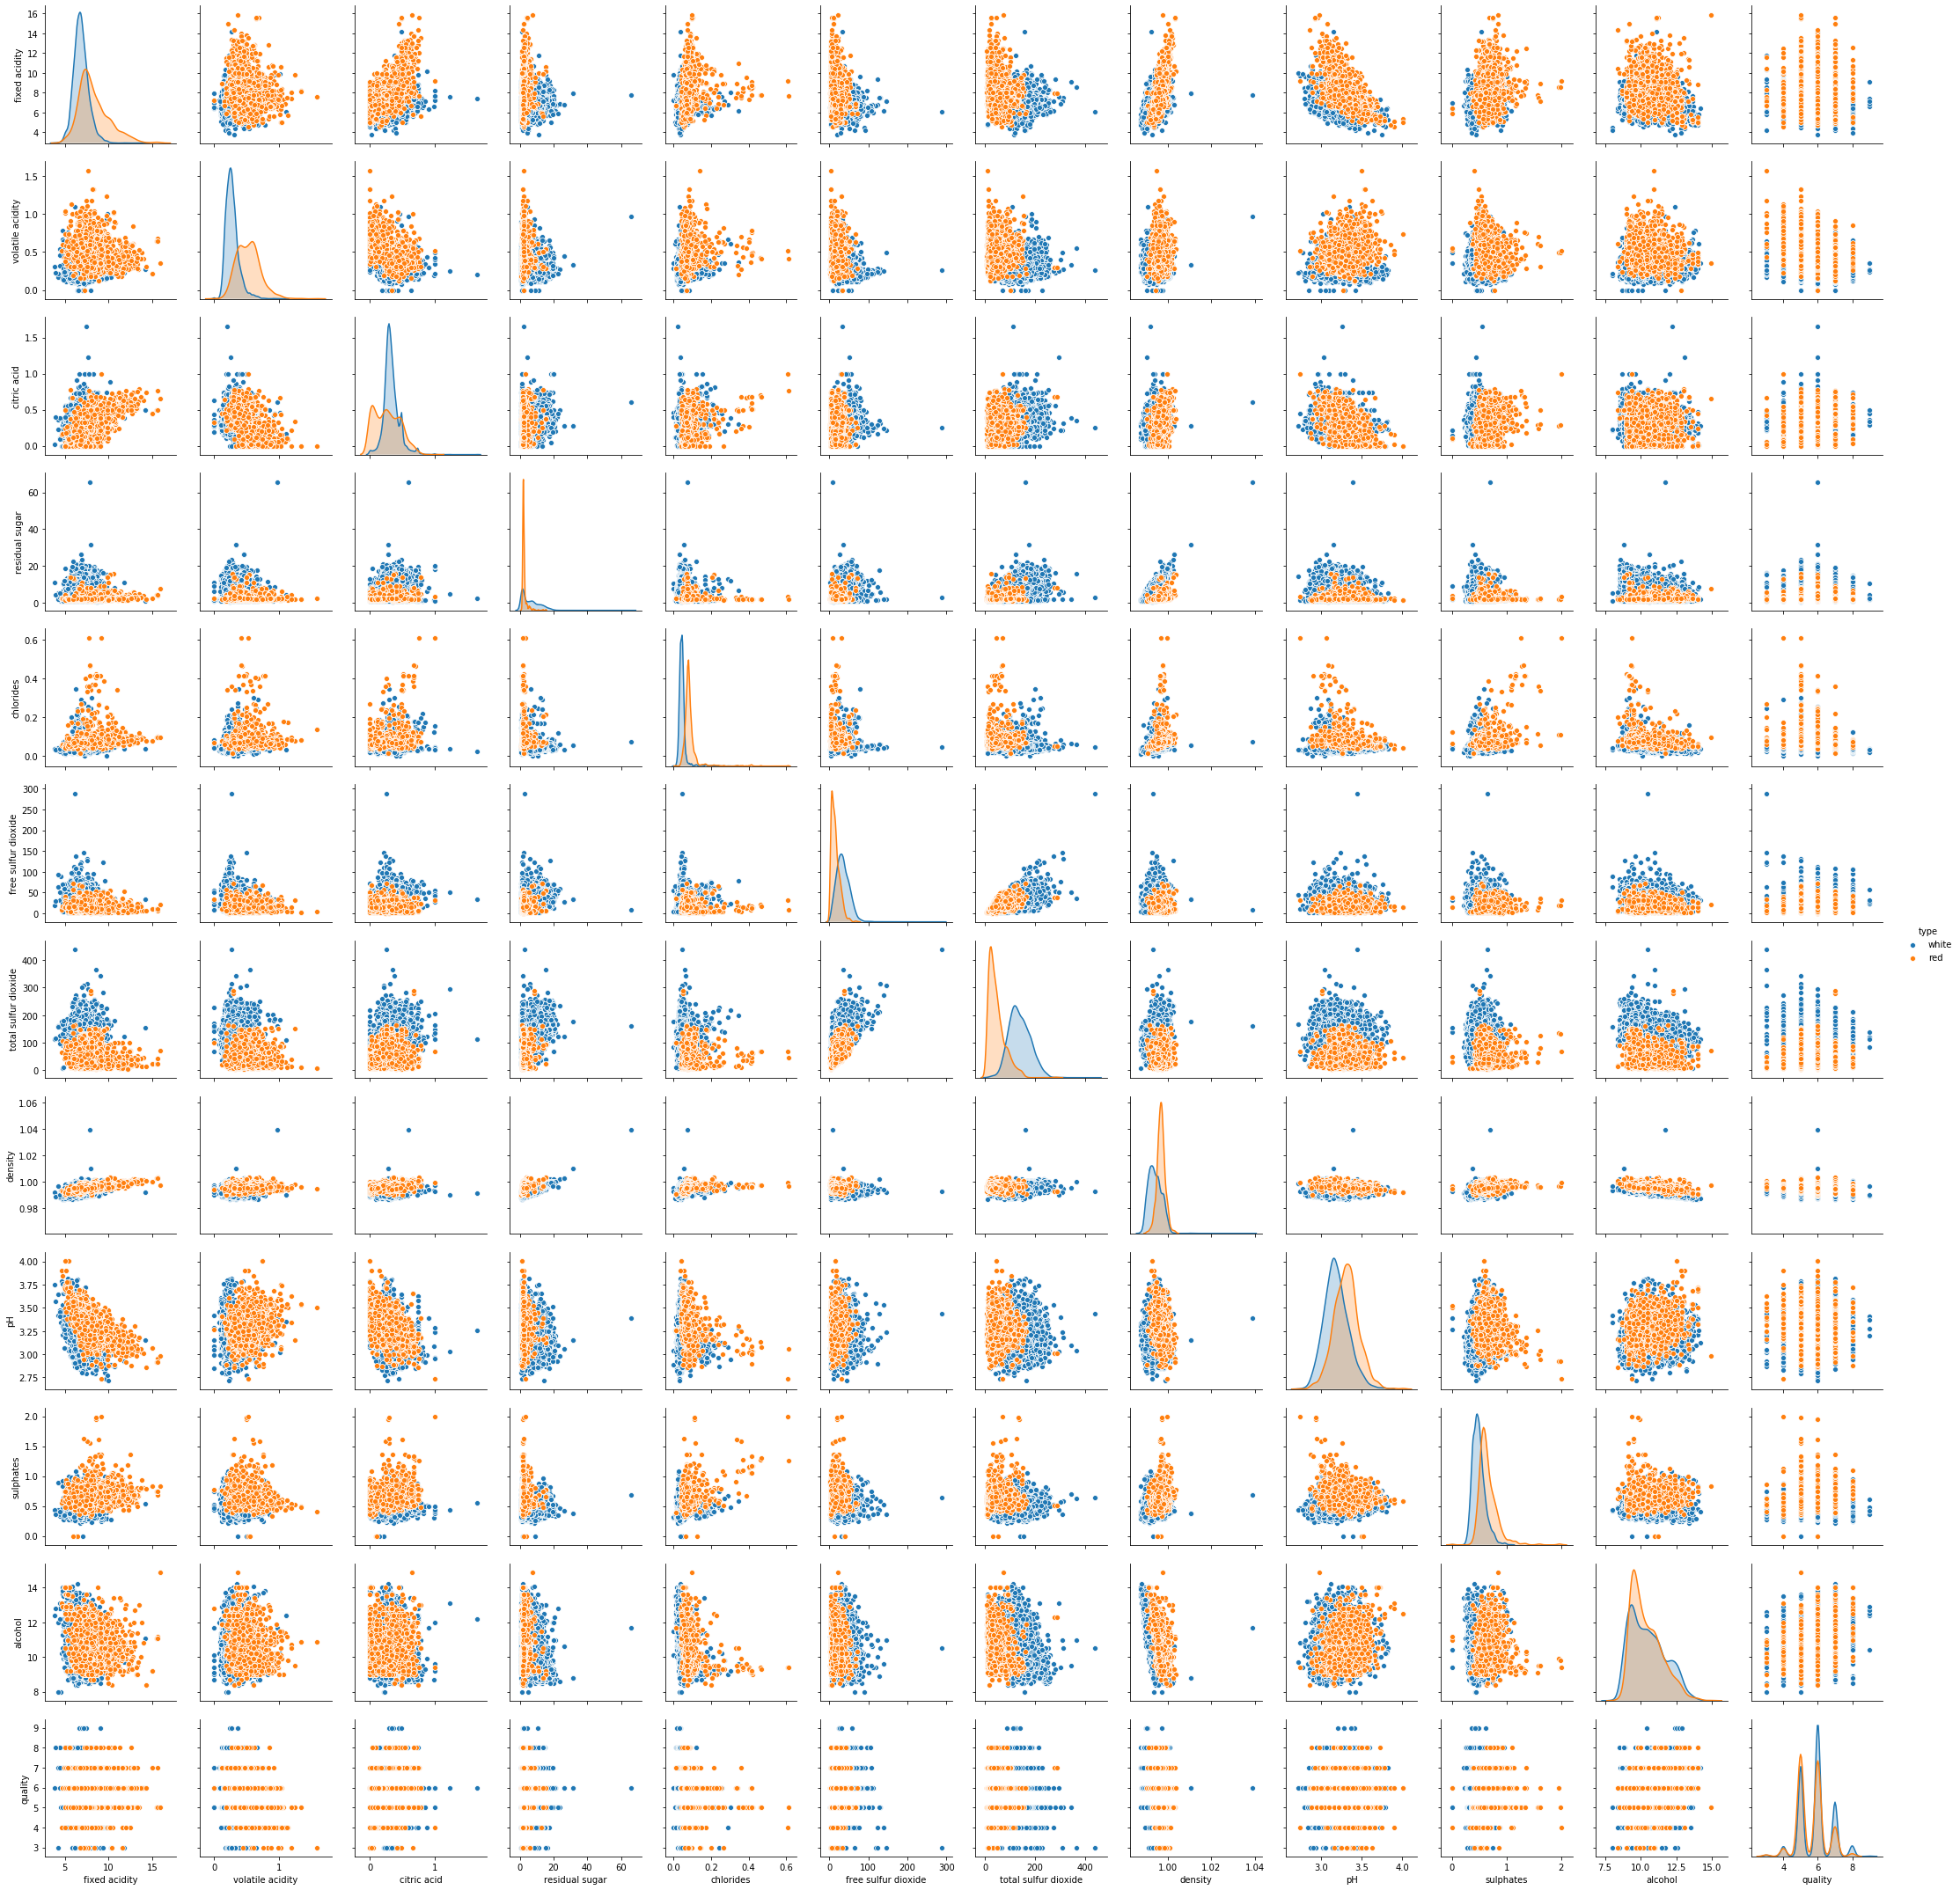

In [8]:
_ = sns.pairplot(df, hue='type')

Некоторые наблюдения:  
— линейная зависимость признака `density`;  
— у многих признаков присутствуют выбросы.

## 3. Подготовка данных

### 3.1. Создание датасетов

In [9]:
def quality_rate(x):
    if x['quality'] > 6:
        res = 1
    else:
        res = 0
    return res

df['quality_rate'] = df.apply(quality_rate, axis=1)
df['quality_rate'].value_counts()

0    5220
1    1277
Name: quality_rate, dtype: int64

In [10]:
X = df.iloc[:, 1:12]
y = df['quality_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 4. Моделирование

### 4.1. Логистическая регрессия

In [22]:
param_grid = [{
    'C': np.linspace(0.001,1,10, dtype=float),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}]

In [12]:
logreg = LogisticRegression(n_jobs=-1)

gs_log = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=10)
gs_log = gs_log.fit(X_train_std, y_train)

In [13]:
print(f"Model: {str(logreg).split('(')[0]}")
print(f"Accuracy: {gs_log.best_score_}")
print(f"Best params: {gs_log.best_params_}")

Model: LogisticRegression
Accuracy: 0.8185471320586928
Best params: {'C': 0.1437142857142857, 'penalty': 'l2', 'solver': 'liblinear'}


### 4.2. Дерево решений

In [14]:
param_grid = [{
    'max_depth': np.linspace(1,20,5, dtype=int),
    'criterion': ['entropy', 'gini', 'error'],
    'max_leaf_nodes': np.linspace(1,30,10, dtype=int)
}]

In [15]:
tree = DecisionTreeClassifier()

gs_tree = GridSearchCV(estimator=tree, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs_tree = gs_tree.fit(X_train, y_train)

In [16]:
print(f"Model: {str(tree).split('(')[0]}")
print(f"Accuracy: {gs_tree.best_score_}")
print(f"Best params: {gs_tree.best_params_}")

Model: DecisionTreeClassifier
Accuracy: 0.831242774566474
Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 23}


### 4.3. XGBoost

In [17]:
param_grid = {
    'max_depth': np.linspace(1,50,10, dtype=int),
    'n_estimators': np.linspace(1,100,10, dtype=int)
}

In [18]:
xgb = xgb.XGBClassifier(objective = 'binary:logistic', n_jobs=-1)

In [19]:
gs_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = make_scorer(accuracy_score), 
                      cv = 10, refit = 'accuracy_score')

In [20]:
gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=-1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  6, 11, 17, 22, 28, 33, 39, 44, 50]),
                         'n_estimators': array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])},
             pre_dis

In [21]:
print(f"Model: {str(xgb).split('(')[0]}")
print(f"Accuracy: {gs_xgb.best_score_}")
print(f"Best params: {gs_xgb.best_params_}")

Model: XGBClassifier
Accuracy: 0.8857029049948124
Best params: {'max_depth': 28, 'n_estimators': 100}


## 5. Оценка

In [27]:
gs_list = [gs_log, gs_tree, gs_xgb]

In [42]:
for gs in gs_list:
    y_pred = gs.best_estimator_.predict(X_test)
    print(f"Model: {str(gs).split('=')[3].split('(')[0]}")
    print('Accuracy: %.2f' % accuracy_score(y_true=y_test, y_pred=y_pred))
    print('Precision: %.2f' % precision_score(y_true=y_test, y_pred=y_pred))
    print('Recall: %.2f' % recall_score(y_true=y_test, y_pred=y_pred))
    print('f1_score: %.2f' % f1_score(y_true=y_test, y_pred=y_pred))
    print()

Model: LogisticRegression
Accuracy: 0.69
Precision: 0.10
Recall: 0.08
f1_score: 0.09

Model: DecisionTreeClassifier
Accuracy: 0.84
Precision: 0.66
Recall: 0.32
f1_score: 0.44

Model: XGBClassifier
Accuracy: 0.87
Precision: 0.75
Recall: 0.53
f1_score: 0.62



## 6. Развертывание

Лучшие оценки получила модель XGBClassifier, поэтому рекомендуем ее к внедрению.

In [43]:
y_pred = gs_xgb.best_estimator_.predict(X_test)
y_pred = pd.DataFrame(y_pred)
df['y_pred'] = y_pred
df.to_csv('wine_prediction_1.csv', index = False )